In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Level 7 output
df = pd.read_csv("/Users/ompandya/Desktop/operational-demand-forecasting/data/processed/monitoring_7day.csv")
df["date"] = pd.to_datetime(df["date"])

df.tail()


,date,daily_request_count,requests,y_true_7day,y_pred,abs_error,rolling_mae,status
721,2024-12-27,8580,8580,9295.714286,9419.428571,123.714286,296.760204,OK
722,2024-12-28,7561,7561,9196.714286,9295.714286,99.000000,300.255102,OK
723,2024-12-29,11235,11235,9149.142857,9196.714286,47.571429,300.724490,OK
724,2024-12-30,11680,11680,8986.428571,9149.142857,162.714286,295.066327,OK
725,2024-12-31,11751,11751,9436.142857,8986.428571,449.714286,307.438776,OK


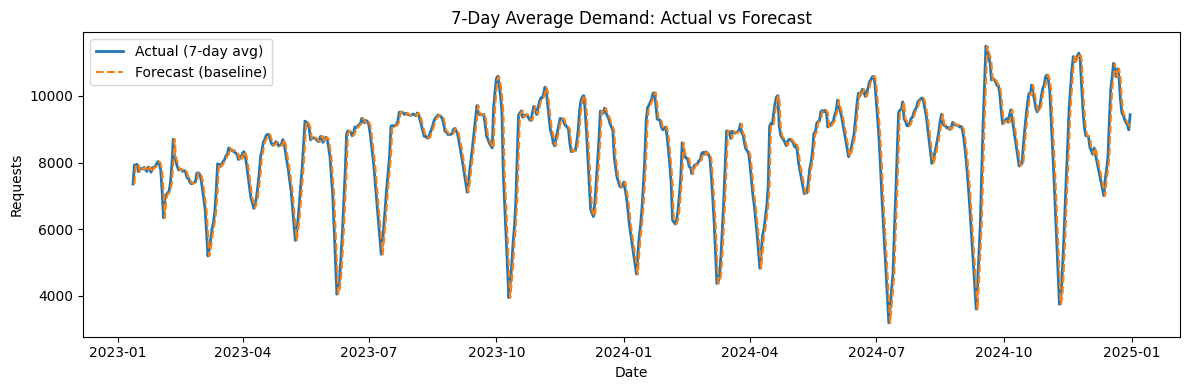

In [2]:
plt.figure(figsize=(12, 4))

plt.plot(df["date"], df["y_true_7day"], label="Actual (7-day avg)", linewidth=2)
plt.plot(df["date"], df["y_pred"], label="Forecast (baseline)", linestyle="--")

plt.title("7-Day Average Demand: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Requests")
plt.legend()
plt.tight_layout()
plt.show()


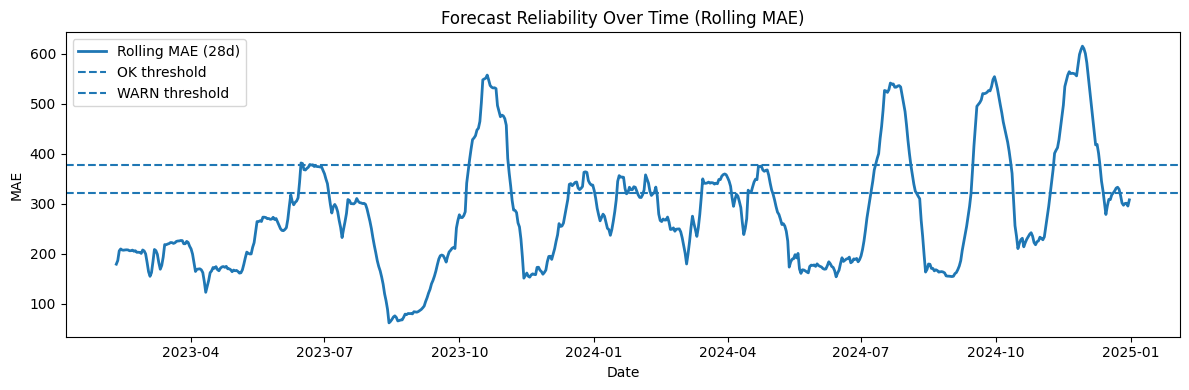

In [3]:
plt.figure(figsize=(12, 4))

plt.plot(df["date"], df["rolling_mae"], label="Rolling MAE (28d)", linewidth=2)

ok_threshold = 322
warn_threshold = 378

plt.axhline(ok_threshold, linestyle="--", label="OK threshold")
plt.axhline(warn_threshold, linestyle="--", label="WARN threshold")

plt.title("Forecast Reliability Over Time (Rolling MAE)")
plt.xlabel("Date")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
latest = df.dropna(subset=["rolling_mae"]).iloc[-1]

print("LEVEL 8 — Decision Summary")
print("--------------------------")
print(f"Date: {latest['date'].date()}")
print(f"Rolling MAE (28d): ~{latest['rolling_mae']:.0f}")
print(f"Status: {latest['status']}")

if latest["status"] == "OK":
    print("Decision: Forecast is reliable for planning.")
elif latest["status"] == "WARN":
    print("Decision: Monitor closely; reliability may be degrading.")
else:
    print("Decision: Forecast unreliable; reassess model or data.")


LEVEL 8 — Decision Summary
--------------------------
Date: 2024-12-31
Rolling MAE (28d): ~307
Status: OK
Decision: Forecast is reliable for planning.
